<a href="https://colab.research.google.com/github/Himanshu-1703/Feature-Engineering/blob/main/Imputations/FE_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/csv files/titanic_krish.csv'

In [ ]:
# import the csv file

df = pd.read_csv(path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The first thing to do in feature engineering is to handle the missing values.

Why are there missing values in the data?
1. People may hesitate to give complete data.
2. Survey informations is not that valid.
3. People may no longer be available.

- Dataset should be collected from multiple sources to get the complete data.

#### Missing data:
2 types:
1. continuous data
2. categorical data


### Missing completely at random(MCAR):

A variable is missing at completely random then the probability of data missing is same for all the observations. There is absolutely no relationship between missing data and other values in the data ie. observed and also missing.

In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [ ]:
# check for missing values in the df

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

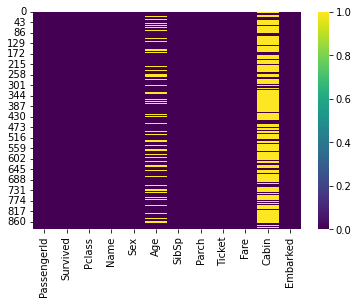

In [ ]:
# plot heatmap of missing values
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isna(),cmap='viridis')
plt.show()

- The data is collected after the accident and shows that the Age and Cabin values are missing because it is linked to those who have not survived the accident.

So here we cannot say that the data is missing completely at random.

#### Missing data not at random: Systematic Missing values

There is relationship between the data missing and the missing or observed values within the database.

In [ ]:
# percentage of missing values in the cabin column

df['Cabin'].isna().mean()

0.7710437710437711

In [ ]:
df['Cabin_missing'] = np.where(df['Cabin'].isna(),1,0)

In [ ]:
df.groupby('Survived')['Cabin_missing'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_missing, dtype: float64

This information shows that the cabin values depend on the survive column and the data is not missing completely at random.

#### Missing at random(MAR):

1. Mean/Median Replacement.
2. Random Sample Imputation
3. Capturing missing values with a new feature.
4. End of distribution imputation.
5. Arbitrary imputation.
6. Frequent Categories imputation.




#### Mean/Median Imputation

- It has the assumption that the data is missing completely at random.
- We replace missing value with median when there are outliers and mean when there are no outliers

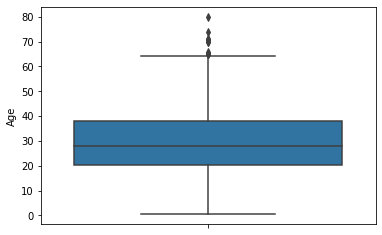

In [ ]:
# check for outliers in the age column

sns.boxplot(y='Age',data=df)
plt.show()

- Age column has outliers so we have to impute the column with median values

In [ ]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median')

df['Age_trans'] = si.fit_transform(df[['Age']])

In [ ]:
# check the standard deviation of the columns

print('SD of age column',df['Age'].std())
print('SD of age_transformed column',df['Age_trans'].std())

SD of age column 14.526497332334042
SD of age_transformed column 13.019696550973201


The standard deviation of the column has changed a little bit after the transformation

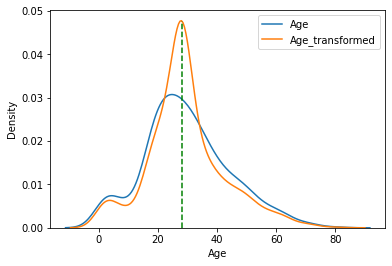

In [ ]:
# plot the distribution 

sns.kdeplot(x='Age',data=df,label='Age')
sns.kdeplot(x='Age_trans',data=df,label='Age_transformed')
plt.axvline(x=df['Age'].median(),ymax=0.95,color='green',linestyle='--')
plt.legend()
plt.show()

The distribution of the column is different because the missing values have been replaced by the median value.

- The area where the median value is more peaked because the missing values are replaced by median.

##### Advantages:
1. Very intuitive to understand.
2. Easy to implement.

##### Disadvantages:
1. Change the dispersion of the data and changes the variance of the data.
2. Changes the correlation of the column.